In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import zipfile
with zipfile.ZipFile('./data (2).zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [3]:
os.listdir('./data')

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [4]:
all_data = pd.DataFrame(columns=['product_id', 'quantity', 'name', 'date'])

In [5]:
for date in os.listdir('./data'):
    for user in os.listdir('./data/{}'.format(date)):
        for file in os.listdir('./data/{}/{}'.format(date, user)):
            df = pd.read_csv('data/{}/{}/{}'.format(date, user, file))
            df['name']=user
            df['date']=date
            all_data = pd.concat([all_data, df])

In [6]:
all_data.reset_index(drop=True)

,product_id,quantity,name,date,Unnamed: 0
0,27,4,Petr_Ivanov,2020-12-05,0.0
1,89,1,Petr_Ivanov,2020-12-05,1.0
2,33,2,Petr_Ivanov,2020-12-05,2.0
3,8,3,Petr_Ivanov,2020-12-05,3.0
4,16,1,Petr_Ivanov,2020-12-05,4.0
...,...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07,0.0
157,94,4,Petr_Fedorov,2020-12-07,1.0
158,95,2,Vasiliy_Ivanov,2020-12-07,0.0
159,83,3,Vasiliy_Ivanov,2020-12-07,1.0


In [7]:
all_data = all_data.drop(columns='Unnamed: 0')

In [8]:
all_data.shape

(161, 4)

In [9]:
all_data.dtypes

product_id    object
quantity      object
name          object
date          object
dtype: object

In [10]:
all_data.quantity.sum()

480

In [131]:
#all_data['date'] = pd.to_datetime(all_data['date'])

In [132]:
#all_data.dtypes

product_id            object
quantity              object
name                  object
date          datetime64[ns]
dtype: object

In [ ]:
#    5.1

In [15]:
all_data_1 = all_data.groupby('name', as_index=False) \
        .agg({'quantity': 'sum'}) \
        .sort_values(['quantity', 'name'], ascending=[False, True])

In [16]:
all_data_1.head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [19]:
all_data_1.query('quantity == {}'.format(all_data.quantity.max()))

,name,quantity


In [18]:
# второй способ, если знаешь максимальное значение
x = all_data_1.query('quantity == 52')
x.name.to_list()

['Alexey_Smirnov', 'Petr_Smirnov']

In [ ]:
#   5.2

In [126]:
all_data_4 = all_data.groupby('product_id', as_index=False) \
        .agg({'quantity': 'sum'}) \
        .rename(columns={'quantity': 'sum_quantity'}) \
        .sort_values('sum_quantity', ascending=False) \
        .head(10)

In [127]:
all_data_4

,product_id,sum_quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


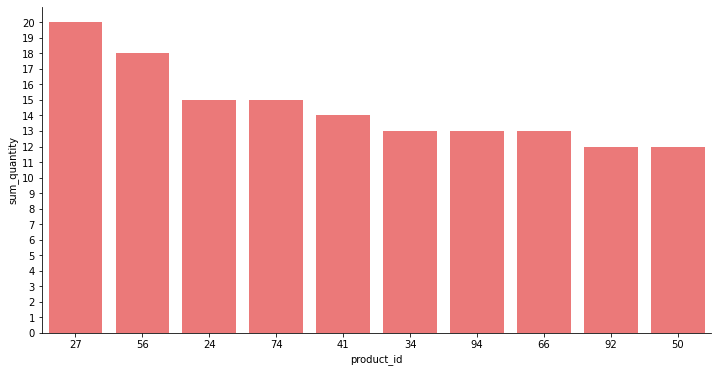

In [140]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='sum_quantity', data=all_data_4, 
            color="red", alpha=0.6,
            order=all_data_4['product_id'])

plt.yticks(range(0, 21))
sns.despine()

In [ ]:
# 5.3

In [155]:
all_data_5 = all_data.groupby('date', as_index=False) \
        .agg({'quantity': 'sum'}) \
        .rename(columns={'quantity': 'sum_quantity'})

In [147]:
all_data_5

,date,sum_quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


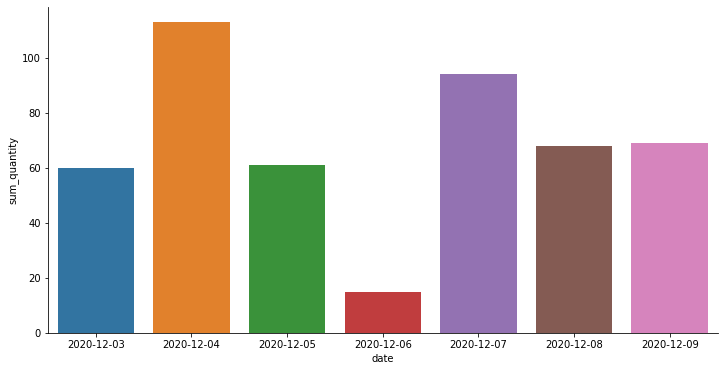

In [156]:
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='sum_quantity', data=all_data_5)

sns.despine()

In [157]:
#    5.4

In [158]:
all_data_wo_dupl = all_data.drop_duplicates(subset=['product_id', 'name', 'date'])

In [162]:
all_data_wo_dupl

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
0,18,4,Petr_Fedorov,2020-12-07
1,94,4,Petr_Fedorov,2020-12-07
0,95,2,Vasiliy_Ivanov,2020-12-07
1,83,3,Vasiliy_Ivanov,2020-12-07


In [173]:
all_data_wo_dupl.groupby(['name', 'product_id'], as_index=False) \
                .agg({'date': 'count'}) \
                .rename(columns={'date': 'amount_purchases'}) \
                .query('amount_purchases > 1')

,name,product_id,amount_purchases
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
